In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [360]:
# 로컬 파일 주소에 있는 csv 데이터 불러오기
df = pd.read_csv('/Users/namin/Desktop/대학/3학년 1학기/인공지능개론/AI-Class/AI-Class/week02/titanic.csv', index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [361]:
#xlsx 파일 웹 주소로 불러오기

import pandas as pd
import requests
from io import BytesIO

# 웹에서 xlsx 파일 다운로드 (URL을 실제 xlsx 파일 링크로 변경해야 함)
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/combined_dataset-1.xlsx"
response = requests.get(url)

# 다운로드한 파일을 pandas DataFrame으로 변환
df = pd.read_excel(BytesIO(response.content), index_col=0)

# Pandas 출력 옵션 설정 (Jupyter Notebook에서 표처럼 보이도록)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)

# 데이터 출력
df

subject_ID Sex(M/F)  Age(year)  Height(cm)  Weight(kg)  Systolic Blood Pressure(mmHg)  Diastolic Blood Pressure(mmHg)  Heart Rate(b/m)  BMI(kg/m^2)          Hypertension Diabetes cerebral infarction cerebrovascular disease     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99   100   101   102   103   104   105   106   107   108   109   110   111   112   113   114   115   116   117   118   119   120   121   122   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   144   145   146   147   148   149   150   151   152   153   154   155   156   157   158   159   160   161   162   163   164   165   166   167   168   169   170   171   172   173   174   175   176   177   178   179   180   181   182   183   184   185   186   187   188   189   190   191   192   193   194   195   196   197   198   199   200   201   202   203   204   205   206   207   208   209   210   211   212   213   214   215   216   217   218   219   220   221   222   223   224   225   226   227   228   229   230   231   232   233   234   235   236   237   238   239   240   241   242   243   244   245   246   247   248   249   250   251   252   253   254   255   256   257   258   259   260   261   262   263   264   265   266   267   268   269   270   271   272   273   274   275   276   277   278   279   280   281   282   283   284   285   286   287   288   289   290   291   292   293   294   295   296   297   298   299   300   301   302   303   304   305   306   307   308   309   310   311   312   313   314   315   316   317   318   319   320   321   322   323   324   325   326   327   328   329   330   331   332   333   334   335   336   337   338   339   340   341   342   343   344   345   346   347   348   349   350   351   352   353   354   355   356   357   358   359   360   361   362   363   364   365   366   367   368   369   370   371   372   373   374   375   376   377   378   379   380   381   382   383   384   385   386   387   388   389   390   391   392   393   394   395   396   397   398   399   400   401   402   403   404   405   406   407   408   409   410   411   412   413   414   415   416   417   418   419   420   421   422   423   424   425   426   427   428   429   430   431   432   433   434   435   436   437   438   439   440   441   442   443   444   445   446   447   448   449   450   451   452   453   454   455   456   457   458   459   460   461   462   463   464   465   466   467   468   469   470   471   472   473   474   475   476   477   478   479   480   481   482   483   484   485   486   487   488   489   490   491   492   493   494   495   496   497   498   499   500   501   502   503   504   505   506   507   508   509   510   511   512   513   514   515   516   517   518   519   520   521   522   523   524   525   526   527   528   529   530   531   532   533   534   535   536   537   538   539   540   541   542   543   544   545   546   547   548   549   550   551   552   553   554   555   556   557   558   559   560   561   562   563   564   565   566   567   568   569   570   571   572   573   574   575   576   577   578   579   580   581   582   583   584   585   586   587   588   589   590   591   592   593   594   595   596   597   598   599   600   601   602   603   604   605   606   607   608   609   610   611   612   613   614   615   616   617   618   619   620   621   622   623   624   625   626   627   628   629   6

In [362]:
#웹에서 cvs 데이터 불러오기

import pandas as pd
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/titanic.csv"

# CSV 파일 다운로드
response = requests.get(url)
csv_data = response.content.decode('utf-8')  # UTF-8로 디코딩

# StringIO를 사용하여 pandas에서 읽기
df = pd.read_csv(StringIO(csv_data), index_col=0)

# Pandas 출력 옵션 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# 데이터 출력
df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [363]:
# 타이타닉 데이터 결측치 처리
# 결측치 처리 시 "왜 결측치가 발생했을까"를 판단하는 과정은 큰 의미

import pandas as pd

# 데이터 로드
df = pd.read_csv('/Users/namin/Desktop/대학/3학년 1학기/인공지능개론/AI-Class/AI-Class/Assignments/week02/titanic.csv')

# 각 열별 결측치 개수 확인
missing_values = df.isnull().sum()

# 결측치 비율까지 함께 출력
missing_percentage = (df.isnull().sum() / len(df)) * 100

# 결측치 정보 출력
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
print(missing_data)

             Missing Values  Percentage (%)
PassengerId               0        0.000000
Survived                  0        0.000000
Pclass                    0        0.000000
Name                      0        0.000000
Sex                       0        0.000000
Age                     177       19.865320
SibSp                     0        0.000000
Parch                     0        0.000000
Ticket                    0        0.000000
Fare                      0        0.000000
Cabin                   687       77.104377
Embarked                  2        0.224467


In [364]:
# 결측치 제거 Age

In [365]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [366]:
# 결측치 제거 Cabin

In [367]:
df['Cabin'].fillna('Unknown', inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [368]:
# 결측치 제거 Embarked

In [369]:
most_common_embarked = df['Embarked'].mode()[0]  # 최빈값 찾기
df['Embarked'].fillna(most_common_embarked, inplace=True)  # 결측치 채우기

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [370]:
# 결측치 정보 다시 계산
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})

# 최신 결측치 정보 출력
print(missing_data)


             Missing Values  Percentage (%)
PassengerId               0             0.0
Survived                  0             0.0
Pclass                    0             0.0
Name                      0             0.0
Sex                       0             0.0
Age                       0             0.0
SibSp                     0             0.0
Parch                     0             0.0
Ticket                    0             0.0
Fare                      0             0.0
Cabin                     0             0.0
Embarked                  0             0.0


In [371]:
# 생존자(1)와 사망자(0)의 개수 확인
print(df['Survived'].value_counts())

# 비율(%) 확인
print(df['Survived'].value_counts(normalize=True) * 100)


Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [372]:
# 막대 그래프로 생존 여부 한 눈에 알아보기

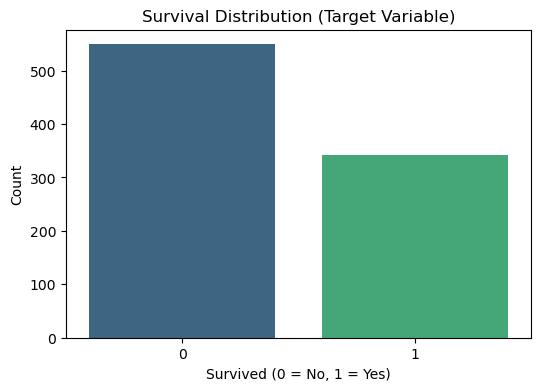

In [373]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title("Survival Distribution (Target Variable)")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [374]:
# 제거할 컬럼 목록
drop_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']

# 데이터프레임에서 해당 컬럼 삭제
df.drop(columns=drop_columns, inplace=True)

# 컬럼 삭제 후 확인
print("삭제 후 남아 있는 컬럼들:")
print(df.columns)

삭제 후 남아 있는 컬럼들:
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [375]:
# 변환 전 Sex, Embarked 분포 확인
print("\n🔹 변환 전 Sex 분포:\n", df['Sex'].value_counts())
print("\n🔹 변환 전 Embarked 분포:\n", df['Embarked'].value_counts())


🔹 변환 전 Sex 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

🔹 변환 전 Embarked 분포:
 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [376]:
# 엔코딩

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [396]:
# 변환 후 Sex 컬럼 분포 확인
print("\n 변환 후 Sex 분포:\n", df['Sex'].value_counts())

# 변환 후 Embarked 원-핫 인코딩 결과 확인
embarked_counts = pd.Series({
    'Embarked_Q': df['Embarked_Q'].sum(),
    'Embarked_S': df['Embarked_S'].sum()
})

print("\n 변환 후 Embarked 분포:\n", embarked_counts)



 변환 후 Sex 분포:
 Sex
0    577
1    314
Name: count, dtype: int64

 변환 후 Embarked 분포:
 Embarked_Q     77
Embarked_S    646
dtype: int64


In [398]:
from sklearn.model_selection import train_test_split

# X(입력 데이터), y(목표 변수) 분리
X = df.drop(columns=['Survived'])  # 예측할 대상 제거
y = df['Survived']

# 훈련 데이터(80%) & 테스트 데이터(20%) 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" 훈련 데이터 크기:", X_train.shape)
print(" 테스트 데이터 크기:", X_test.shape)


 훈련 데이터 크기: (712, 8)
 테스트 데이터 크기: (179, 8)


In [402]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터 분할
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 연속형 변수 정규화
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

# 모델 초기화
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500),  # max_iter 증가
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

# 모델 학습 및 평가
accuracy_results = {}
y_preds = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    accuracy_results[name] = accuracy
    y_preds[name] = y_pred
    print(f"✅ {name} Accuracy: {accuracy:.4f}")


✅ Random Forest Accuracy: 0.8156
✅ Decision Tree Accuracy: 0.7709
✅ Logistic Regression Accuracy: 0.8101
✅ K-Nearest Neighbors Accuracy: 0.8156
✅ Support Vector Machine Accuracy: 0.8156


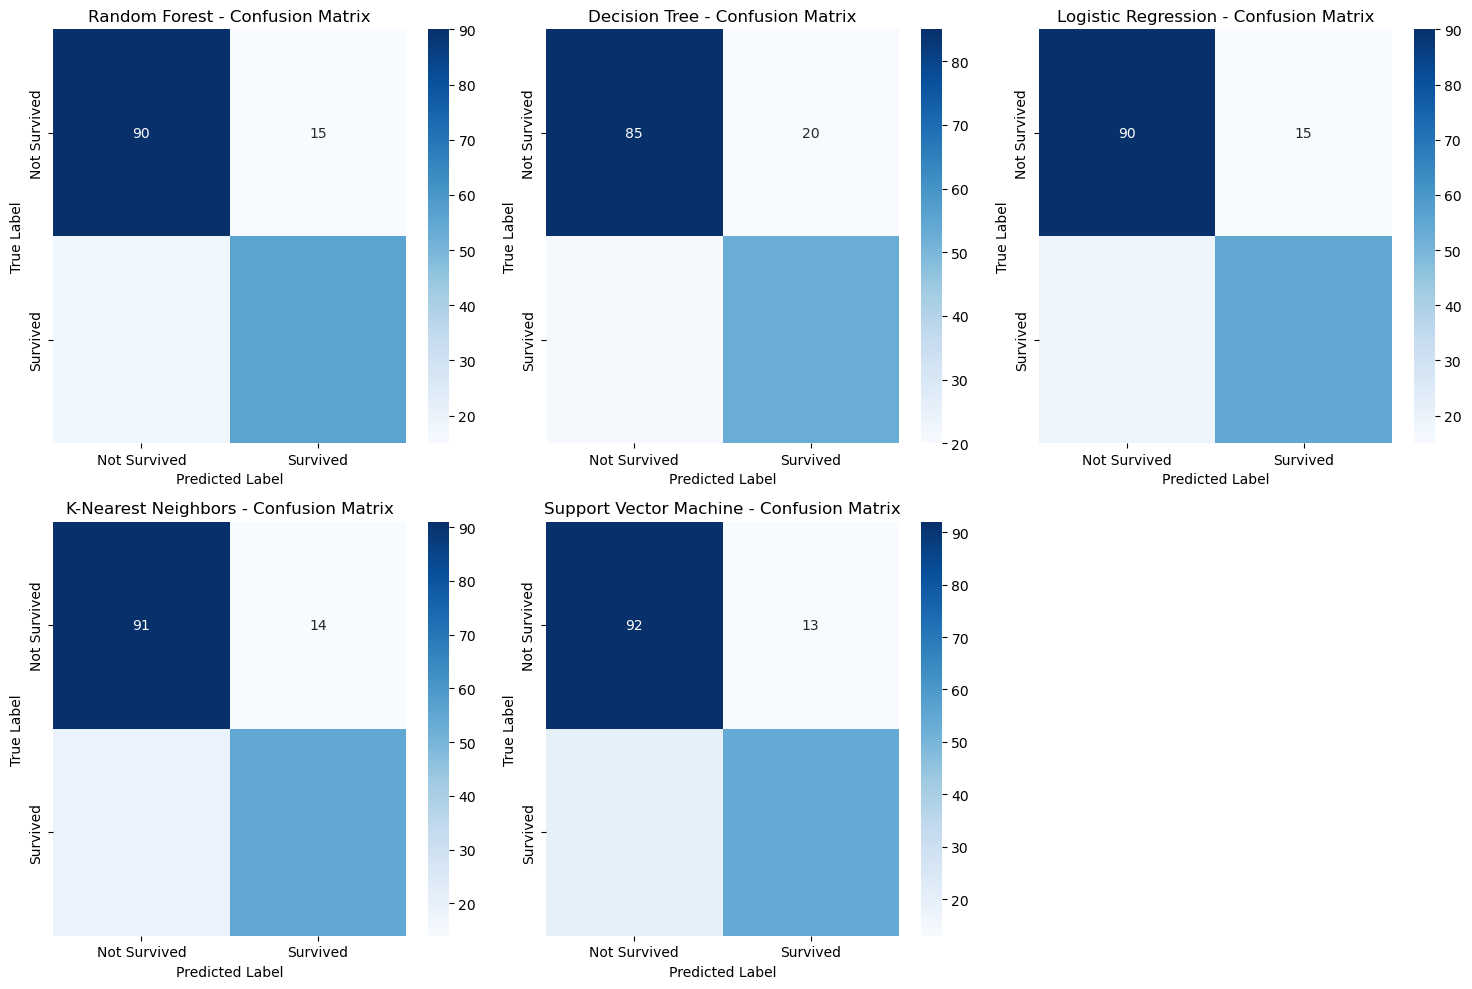

In [406]:
#confu

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 10))

for i, (name, y_pred) in enumerate(y_preds.items(), 1):
    plt.subplot(2, 3, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()
